In [ ]:

%pprint
import sys
import os.path as osp
sys.path.insert(1, osp.abspath(osp.join(os.pardir, 'py')))
from StatsByCountry import nu


# Weekly Worship vs Human Development Index


According to Wikipedia, the **Human Development Index** (HDI) s a statistical composite index of life expectancy, education (mean years of schooling completed and expected years of schooling upon entering the education system), and per capita income indicators, which is used to rank countries into four tiers of human development. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. It was developed by Pakistani economist Mahbub ul-Haq and was further used to measure a country's development by the United Nations Development Programme (UNDP)'s Human Development Report Office.

[RadicalLiberation](https://www.youtube.com/@RadicalLiberation), in his reading of _Triumph of Faith_ by Rodney Stark ([Global Religious Resurgence](https://www.youtube.com/live/RxZbjmuSZfI?si=f0e6oC9lBThQ6kE6&t=1365)), states that "he says that you cannot find a correlation between modernization and religiousness (which would be the suggestion of the secularization thesis)". I wanted to see if I could reproduce it.

The worship data is from [https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf](https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf) and the HDI data is from [https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index](https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index). The jupyter notebook can be seen at [https://github.com/dbabbitt/StatsByCountry/blob/master/scatterplots/Weekly%20Worship%20vs%20Human%20Development%20Index.ipynb](https://github.com/dbabbitt/StatsByCountry/blob/master/scatterplots/Weekly%20Worship%20vs%20Human%20Development%20Index.ipynb).

A [low R-square of at least 0.1 (or 10 percent)](https://www.researchgate.net/publication/361406942_The_Acceptable_R-Square_in_Empirical_Modelling_for_Social_Science_Research) is acceptable in the social sciences on the condition that some or most of the predictors or explanatory variables are statistically significant.

In [1]:

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index'
table_dfs_list = nu.get_page_tables(url)

Pretty printing has been turned OFF
[(1, (193, 5)), (2, (15, 8)), (3, (20, 2)), (10, (13, 2)), (12, (13, 2)), (14, (8, 2)), (13, (6, 2)), (0, (3, 3)), (4, (2, 2)), (6, (2, 2)), (7, (2, 2)), (8, (2, 2)), (9, (2, 2)), (11, (2, 2)), (5, (1, 2))]


In [2]:

hdi_df = table_dfs_list[1].copy()
hdi_df.columns = ['Rank', 'Δ', 'Country', 'hdi_value', 'percent_annual_growth_2010_2022']
hdi_df

,Rank,Δ,Country,hdi_value,percent_annual_growth_2010_2022
0,1,NaN,Switzerland,0.967,0.24%
1,2,(1),Norway,0.966,0.25%
2,3,NaN,Iceland,0.959,0.28%
3,4,(2),Hong Kong,0.956,0.38%
4,5,(1),Denmark,0.952,0.35%
...,...,...,...,...,...
188,189,(2),Niger,0.394,1.34%
189,189,NaN,Chad,0.394,0.66%
190,191,NaN,Central African Republic,0.387,0.67%
191,192,(2),South Sudan,0.381,0.53%


In [3]:

# From https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf
import pandas as pd
import re

file_path = '../data/html/religious_commitment_by_country.html'
commitment_df = pd.read_html(file_path)[0].copy()
commitment_df.columns = [str(cn).replace(' ', '_') for cn in commitment_df.iloc[0]]
commitment_df = commitment_df.iloc[1:]
for cn in ['Overall_Affiliate', 'Overall_Attend_weekly', 'Overall_Pray_daily', 'Overall_Very_important', 'Adults_<_40_Affiliate',
           'Adults_<_40_Attend_weekly', 'Adults_<_40_Pray_daily', 'Adults_<_40_Very_important', 'Adults_40+_Affiliate',
           'Adults_40+_Attend_weekly', 'Adults_40+_Pray_daily', 'Adults_40+_Very_important']:
    commitment_df[cn] = commitment_df[cn].map(lambda x: re.sub(r'\D+', '', str(x)))
    commitment_df[cn] = pd.to_numeric(commitment_df[cn], errors='coerce')
commitment_df

,Country,Overall_Affiliate,Overall_Attend_weekly,Overall_Pray_daily,Overall_Very_important,Adults_<_40_Affiliate,Adults_<_40_Attend_weekly,Adults_<_40_Pray_daily,Adults_<_40_Very_important,Adults_40+_Affiliate,Adults_40+_Attend_weekly,Adults_40+_Pray_daily,Adults_40+_Very_important
1,World,88,39,49,54,85,36,44.0,51.0,90.0,42.0,54.0,57.0
2,Asia-Pacific,85,34,50,53,82,31,46.0,51.0,86.0,37.0,55.0,55.0
3,Europe,81,14,22,23,75,10,16.0,19.0,85.0,16.0,26.0,26.0
4,Latin America-Caribbean,90,43,62,68,87,38,55.0,63.0,93.0,48.0,69.0,73.0
5,Middle East-North Africa,100,49,70,73,100,44,65.0,71.0,100.0,55.0,77.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Uruguay,63,14,29,29,52,10,18.0,22.0,70.0,16.0,36.0,33.0
109,Uzbekistan,99,9,26,29,100,8,18.0,26.0,98.0,11.0,36.0,34.0
110,Venezuela,93,26,47,67,91,21,44.0,64.0,97.0,31.0,52.0,70.0
111,Vietnam,36,14,18,36,15,16,36.0,13.0,21.0,NaN,NaN,NaN


In [4]:

mask_series = (commitment_df.Country == 'Puerto Rico')
commitment_df.loc[mask_series, 'Country'] = 'Puerto Rico (US)'
mask_series = (commitment_df.Country == 'Dominican Rep.')
commitment_df.loc[mask_series, 'Country'] = 'Dominican Republic'
mask_series = (commitment_df.Country == 'Congo DR')
commitment_df.loc[mask_series, 'Country'] = 'DR Congo'
mask_series = (commitment_df.Country == 'Palestinian Terr.')
commitment_df.loc[mask_series, 'Country'] = 'Palestine'
mask_series = (commitment_df.Country == 'Bosnia-Herz.')
commitment_df.loc[mask_series, 'Country'] = 'Bosnia and Herzegovina'

In [5]:

left_list = list(set(hdi_df.Country) - set(commitment_df.Country))
df = nu.check_for_typos(left_list, set(commitment_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
43,Iceland,Ireland,0.857143
36,Gambia,Zambia,0.833333
15,Malawi,Mali,0.800000
32,Congo,DR Congo,0.769231
4,Namibia,Zambia,0.769231
24,Slovenia,Slovakia,0.750000
49,Guyana,Ghana,0.727273
19,Syria,Serbia,0.727273
47,Somalia,Romania,0.714286
33,Cambodia,Zambia,0.714286


In [6]:

left_list = list(set(commitment_df.Country) - set(hdi_df.Country))
df = nu.check_for_typos(left_list, set(hdi_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
7,Sub-Saharan Africa,South Africa,0.666667
4,Middle East-North Africa,South Africa,0.555556
6,World,Poland,0.545455
0,Europe,Turkey,0.500000
2,Kosovo,Lesotho,0.461538
5,Latin America-Caribbean,San Marino,0.424242
3,Asia-Pacific,Austria,0.421053
1,Puerto Rico (US),Costa Rica,0.384615


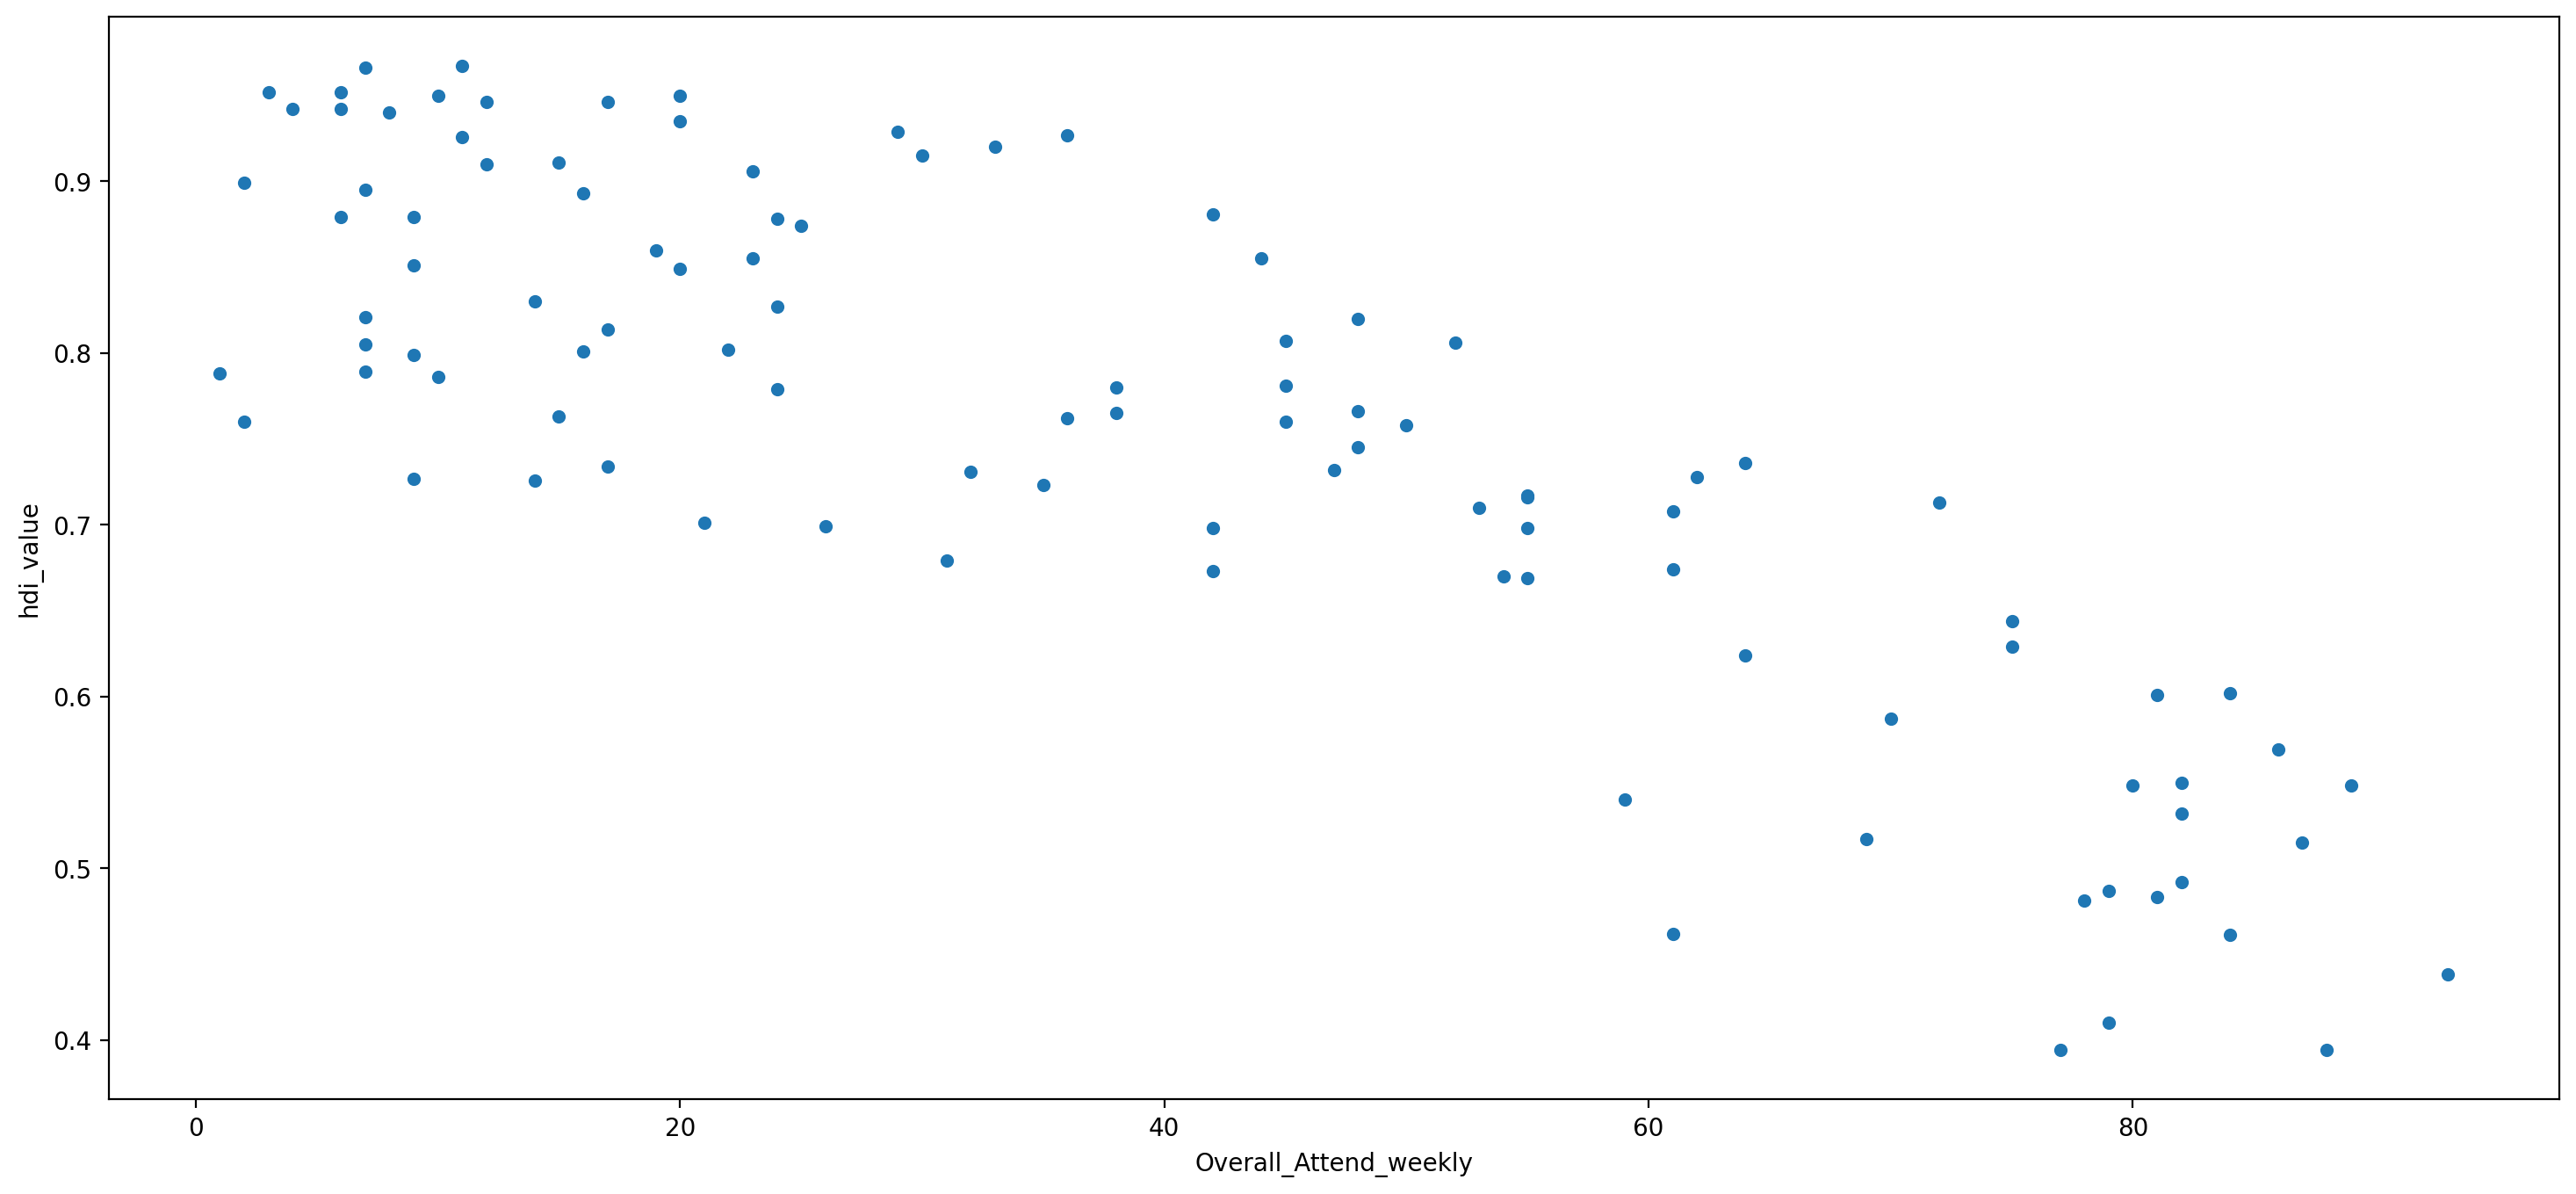

In [81]:

import matplotlib.pyplot as plt

countries_set = set(commitment_df.Country).intersection(set(hdi_df.Country))
rows_list = []
for country_name in countries_set:
    row_dict = {}
    row_dict['country_name'] = country_name
    mask_series = (commitment_df.Country == country_name)
    Overall_Attend_weekly = commitment_df[mask_series].Overall_Attend_weekly.squeeze()
    row_dict['Overall_Attend_weekly'] = Overall_Attend_weekly
    mask_series = (hdi_df.Country == country_name)
    hdi_value = hdi_df[mask_series].hdi_value.squeeze()
    row_dict['hdi_value'] = hdi_value
    rows_list.append(row_dict)
hdi_vs_worship_df = pd.DataFrame(rows_list).sort_values('Overall_Attend_weekly')
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
Line2D_objs_list = hdi_vs_worship_df.plot.scatter('Overall_Attend_weekly', 'hdi_value', ax=ax)

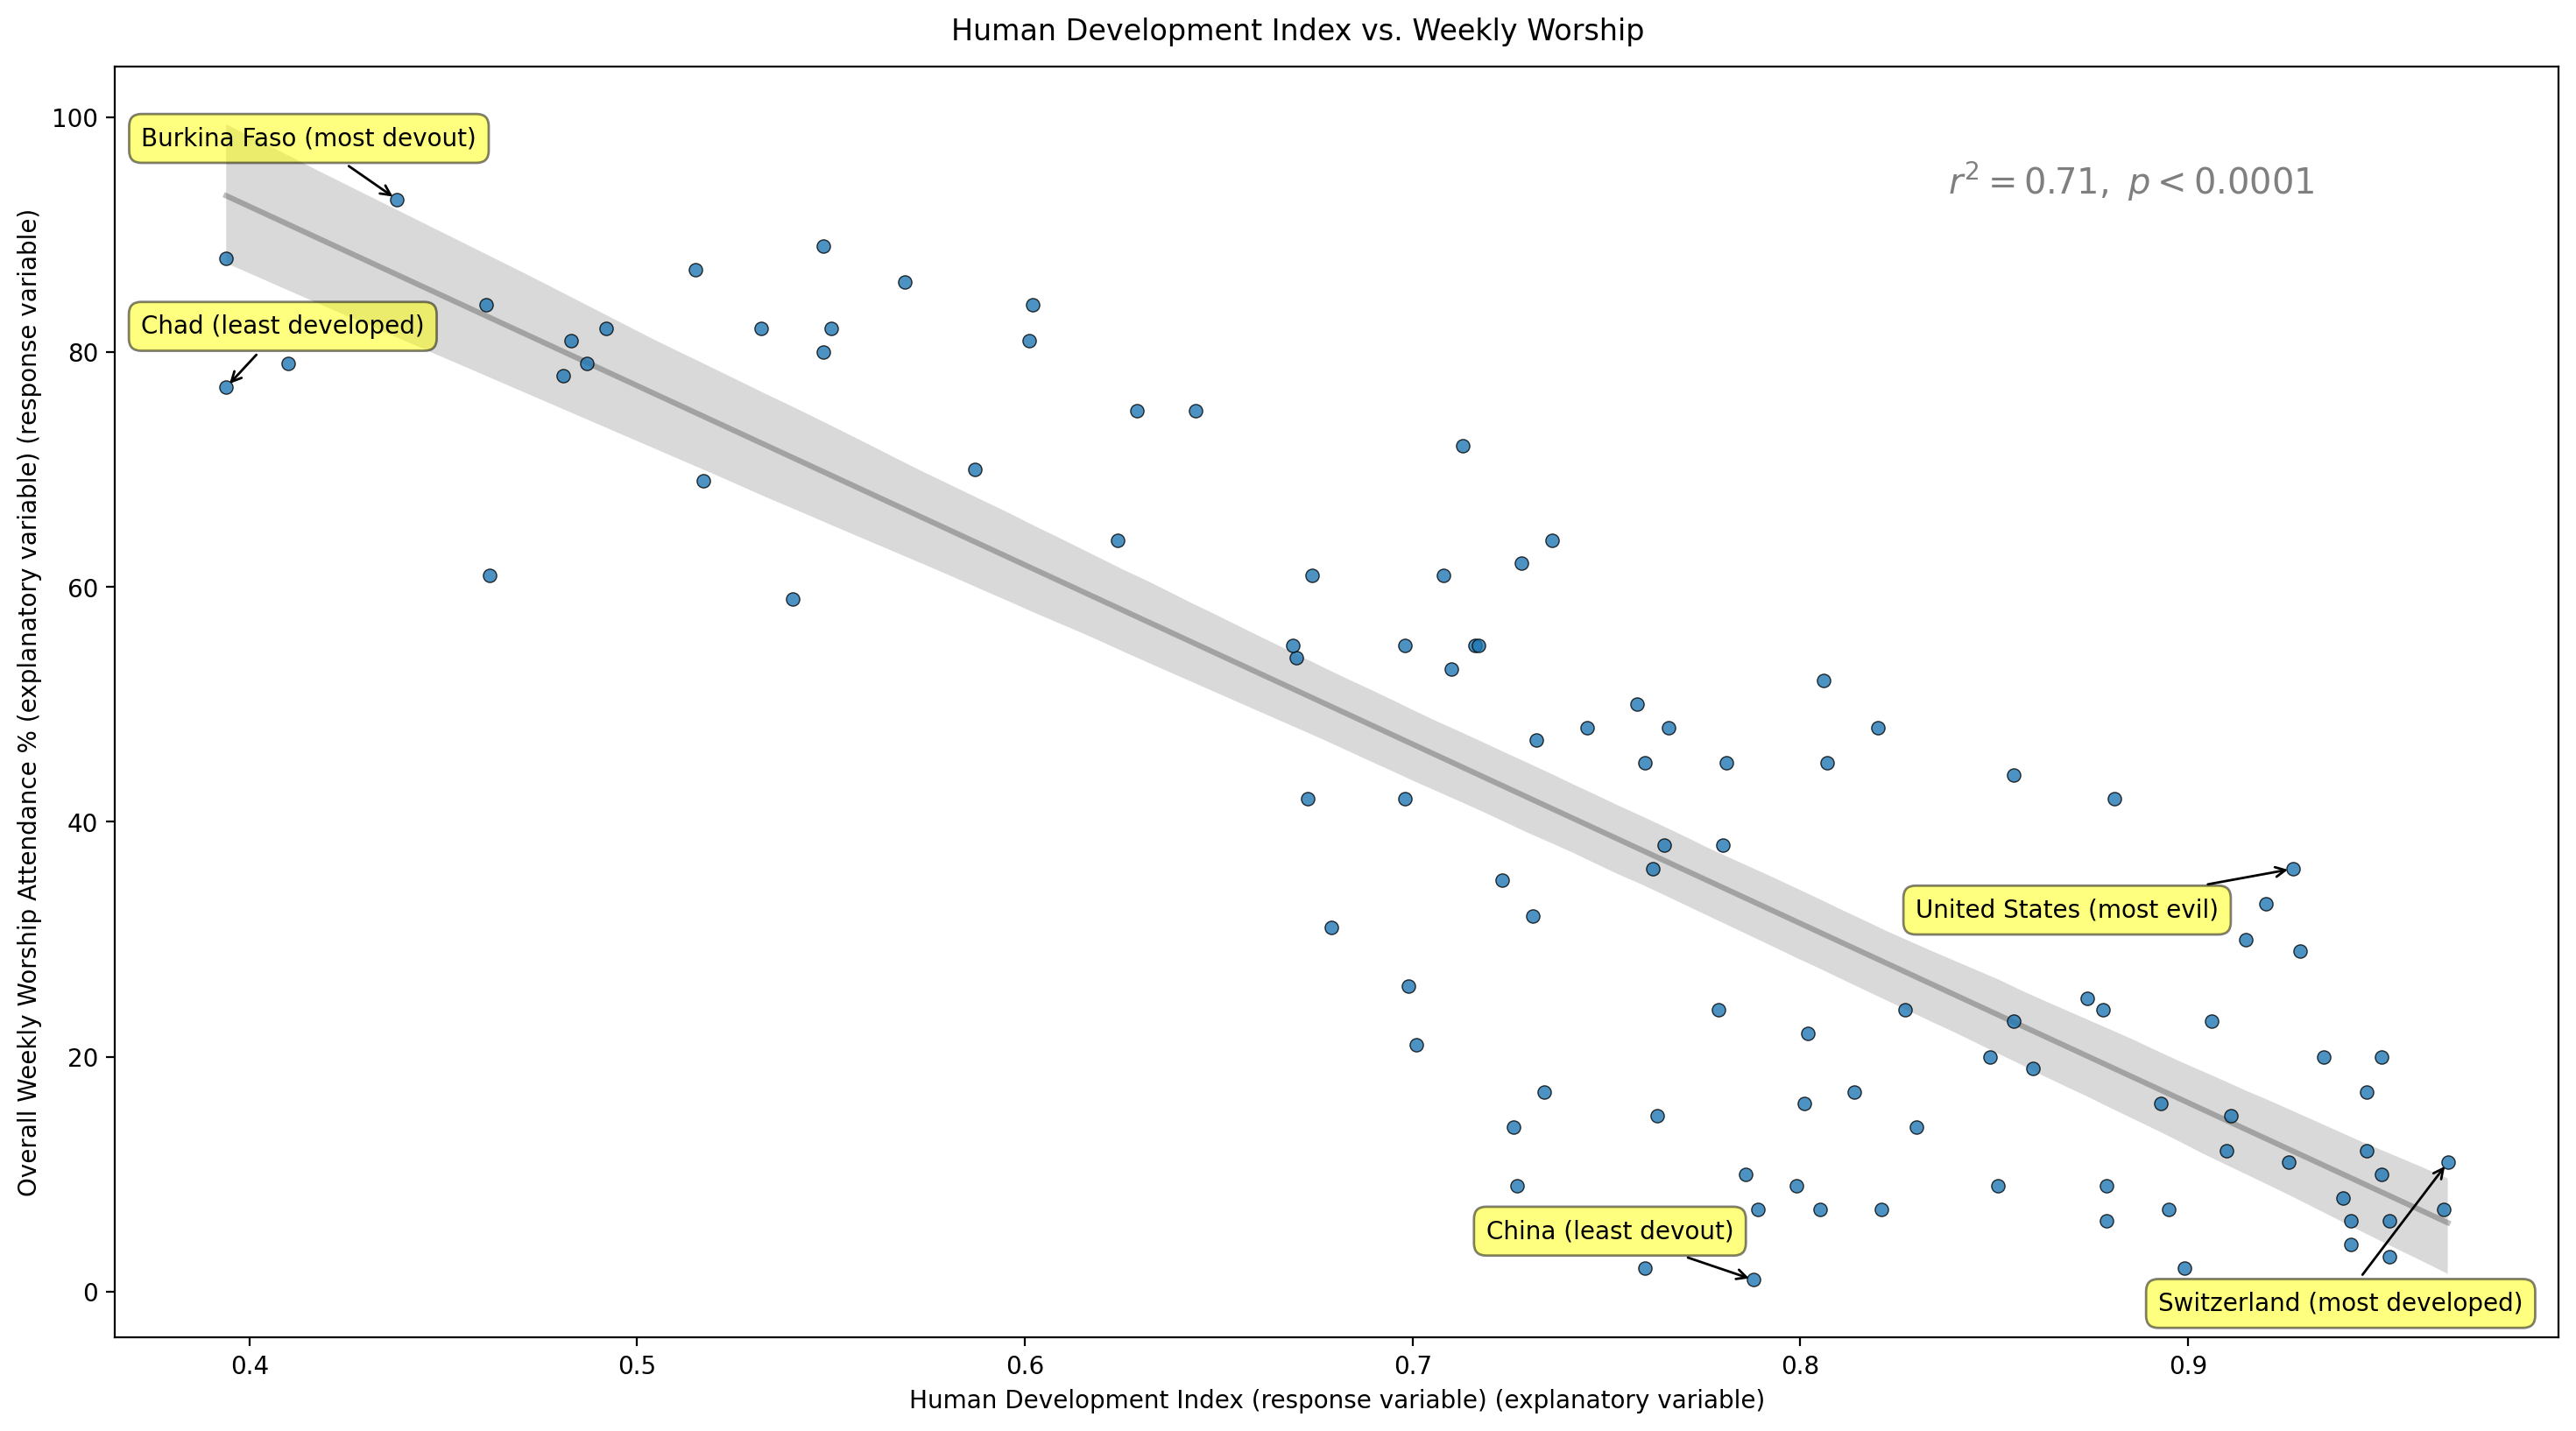

In [82]:

fig = nu.first_order_linear_scatterplot(
    hdi_vs_worship_df.set_index('country_name'), 'hdi_value', 'Overall_Attend_weekly',
    xlabel_str='Human Development Index (response variable)',
    ylabel_str='Overall Weekly Worship Attendance % (explanatory variable)',
    x_adj='developed', y_adj='devout',
    title='Human Development Index vs. Weekly Worship',
    # idx_reference='Kenya', annot_reference='',
    least_x_xytext=(-35, 20), most_x_xytext=(-119, -63),
    least_y_xytext=(-110, 15), most_y_xytext=(-105, 20),
    reference_xytext=(-155, -22), color_list=None
)


The US label is a light-hearted parody of the morally conceited nature of Woke social dynamics. Take it in the spirit it was given.

## Looking closer at the table at 23:24, I see that Stark is only correlating Europe
Let's filter out everything but the European countries and look at the correlation

In [76]:

# Get list of European countries
url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_Europe'
table_dfs_list = nu.get_page_tables(url)

[(1, (50, 8)), (4, (6, 8)), (2, (5, 8)), (12, (20, 2)), (7, (12, 3)), (6, (3, 8)), (8, (4, 2)), (11, (4, 2)), (15, (4, 2)), (17, (4, 2)), (10, (3, 2)), (16, (3, 2)), (18, (3, 2)), (19, (3, 2)), (9, (2, 2)), (13, (2, 2)), (0, (1, 2)), (3, (1, 2)), (5, (1, 2)), (14, (1, 2))]


In [77]:

# Grab the largest table and clean it up
europe_df = table_dfs_list[1].copy()
europe_df.columns = ['Flag', 'Map', 'English', 'Domestic', 'Capital', 'Population', 'Area', 'Currency']
europe_df.sample(5)

,Flag,Map,English,Domestic,Capital,Population,Area,Currency
26,NaN,NaN,Lithuania* Republic of Lithuania LTU,Lithuanian: Lietuva – Lietuvos Respublika,Vilnius Lithuanian: Vilnius,2786651,"65,300 km2 (25,212 sq mi)",Euro
37,NaN,NaN,Romania* ROU,Romanian: România,Bucharest Romanian: București,19328560,"238,391 km2 (92,043 sq mi)",Romanian leu
7,NaN,NaN,Bosnia and Herzegovina BIH,Bosnian: Bosna i Hercegovina Croatian: Bosna i...,Sarajevo Bosnian: Sarajevo Croatian: Sarajevo ...,3270943,"51,197 km2 (19,767 sq mi)",Bosnia and Herzegovina convertible mark
18,NaN,NaN,Greece* Hellenic Republic GRC,Greek: Ελλάδα – Ελληνική Δημοκρατία (Elláda – ...,Athens Greek: Αθήνα (Athína),10445365,"131,957 km2 (50,949 sq mi)",Euro
22,NaN,NaN,Italy* Italian Republic ITA,Italian: Italia – Repubblica Italiana,Rome Italian: Roma,59240329,"301,340 km2 (116,348 sq mi)",Euro


In [78]:

# Create a dictionary of ISO 3166-1 alpha-3 codes
iso_dict = {
    'ABW': 'Aruba',
    'AFG': 'Afghanistan',
    'AGO': 'Angola',
    'AIA': 'Anguilla',
    'ALA': 'Åland Islands',
    'ALB': 'Albania',
    'AND': 'Andorra',
    'ARE': 'United Arab Emirates',
    'ARG': 'Argentina',
    'ARM': 'Armenia',
    'ASM': 'American Samoa',
    'ATA': 'Antarctica',
    'ATF': 'French Southern and Antarctic Lands',
    'ATG': 'Antigua and Barbuda',
    'AUS': 'Australia',
    'AUT': 'Austria',
    'AZE': 'Azerbaijan',
    'BDI': 'Burundi',
    'BEL': 'Belgium',
    'BEN': 'Benin',
    'BES': 'Caribbean Netherlands',
    'BFA': 'Burkina Faso',
    'BGD': 'Bangladesh',
    'BGR': 'Bulgaria',
    'BHR': 'Bahrain',
    'BHS': 'The Bahamas',
    'BIH': 'Bosnia and Herzegovina',
    'BLM': 'Saint Barthélemy',
    'BLR': 'Belarus',
    'BLZ': 'Belize',
    'BMU': 'Bermuda',
    'BOL': 'Bolivia',
    'BRA': 'Brazil',
    'BRB': 'Barbados',
    'BRN': 'Brunei',
    'BTN': 'Bhutan',
    'BVT': 'Bouvet Island',
    'BWA': 'Botswana',
    'CAF': 'Central African Republic',
    'CAN': 'Canada',
    'CCK': 'Cocos (Keeling) Islands',
    'CHE': 'Switzerland',
    'CHL': 'Chile',
    'CHN': 'China',
    'CIV': 'Ivory Coast',
    'CMR': 'Cameroon',
    'COD': 'Democratic Republic of the Congo',
    'COG': 'Republic of the Congo',
    'COK': 'Cook Islands',
    'COL': 'Colombia',
    'COM': 'Comoros',
    'CPV': 'Cabo Verde',
    'CRI': 'Costa Rica',
    'CUB': 'Cuba',
    'CUW': 'Curaçao',
    'CXR': 'Christmas Island',
    'CYM': 'Cayman Islands',
    'CYP': 'Cyprus',
    'CZE': 'Czechia',
    'DEU': 'Germany',
    'DJI': 'Djibouti',
    'DMA': 'Dominica',
    'DNK': 'Denmark',
    'DOM': 'Dominican Republic',
    'DZA': 'Algeria',
    'ECU': 'Ecuador',
    'EGY': 'Egypt',
    'ERI': 'Eritrea',
    'ESH': 'Western Sahara',
    'ESP': 'Spain',
    'EST': 'Estonia',
    'ETH': 'Ethiopia',
    'FIN': 'Finland',
    'FJI': 'Fiji',
    'FLK': 'Falkland Islands',
    'FRA': 'France',
    'FRO': 'Faroe Islands',
    'FSM': 'Federated States of Micronesia',
    'GAB': 'Gabon',
    'GBR': 'United Kingdom',
    'GEO': 'Georgia',
    'GGY': 'Bailiwick of Guernsey',
    'GHA': 'Ghana',
    'GIB': 'Gibraltar',
    'GIN': 'Guinea',
    'GLP': 'Guadeloupe',
    'GMB': 'The Gambia',
    'GNB': 'Guinea-Bissau',
    'GNQ': 'Equatorial Guinea',
    'GRC': 'Greece',
    'GRD': 'Grenada',
    'GRL': 'Greenland',
    'GTM': 'Guatemala',
    'GUF': 'French Guiana',
    'GUM': 'Guam',
    'GUY': 'Guyana',
    'HKG': 'Hong Kong',
    'HMD': 'Heard Island and McDonald Islands',
    'HND': 'Honduras',
    'HRV': 'Croatia',
    'HTI': 'Haiti',
    'HUN': 'Hungary',
    'IDN': 'Indonesia',
    'IMN': 'Isle of Man',
    'IND': 'India',
    'IOT': 'British Indian Ocean Territory',
    'IRL': 'Republic of Ireland',
    'IRN': 'Iran, Islamic Republic of',
    'IRQ': 'Iraq',
    'ISL': 'Iceland',
    'ISR': 'Israel',
    'ITA': 'Italy',
    'JAM': 'Jamaica',
    'JEY': 'Jersey',
    'JOR': 'Jordan',
    'JPN': 'Japan',
    'KAZ': 'Kazakhstan',
    'KEN': 'Kenya',
    'KGZ': 'Kyrgyzstan',
    'KHM': 'Cambodia',
    'KIR': 'Kiribati',
    'KNA': 'Saint Kitts and Nevis',
    'KOR': 'South Korea',
    'KWT': 'Kuwait',
    'LAO': 'Laos',
    'LBN': 'Lebanon',
    'LBR': 'Liberia',
    'LBY': 'Libya',
    'LCA': 'Saint Lucia',
    'LIE': 'Liechtenstein',
    'LKA': 'Sri Lanka',
    'LSO': 'Lesotho',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'LVA': 'Latvia',
    'MAC': 'Macau',
    'MAF': 'Collectivity of Saint Martin',
    'MAR': 'Morocco',
    'MCO': 'Monaco',
    'MDA': 'Moldova',
    'MDG': 'Madagascar',
    'MDV': 'Maldives',
    'MEX': 'Mexico',
    'MHL': 'Marshall Islands',
    'MKD': 'North Macedonia',
    'MLI': 'Mali',
    'MLT': 'Malta',
    'MMR': 'Myanmar',
    'MNE': 'Montenegro',
    'MNG': 'Mongolia',
    'MNP': 'Northern Mariana Islands',
    'MOZ': 'Mozambique',
    'MRT': 'Mauritania',
    'MSR': 'Montserrat',
    'MTQ': 'Martinique',
    'MUS': 'Mauritius',
    'MWI': 'Malawi',
    'MYS': 'Malaysia',
    'MYT': 'Mayotte',
    'NAM': 'Namibia',
    'NCL': 'New Caledonia',
    'NER': 'Niger',
    'NFK': 'Norfolk Island',
    'NGA': 'Nigeria',
    'NIC': 'Nicaragua',
    'NIU': 'Niue',
    'NLD': 'Netherlands',
    'NOR': 'Norway',
    'NPL': 'Nepal',
    'NRU': 'Nauru',
    'NZL': 'New Zealand',
    'OMN': 'Oman',
    'PAK': 'Pakistan',
    'PAN': 'Panama',
    'PCN': 'Pitcairn Islands',
    'PER': 'Peru',
    'PHL': 'Philippines',
    'PLW': 'Palau',
    'PNG': 'Papua New Guinea',
    'POL': 'Poland',
    'PRI': 'Puerto Rico',
    'PRK': 'North Korea',
    'PRT': 'Portugal',
    'PRY': 'Paraguay',
    'PSE': 'State of Palestine',
    'PYF': 'French Polynesia',
    'QAT': 'Qatar',
    'REU': 'Réunion',
    'ROU': 'Romania',
    'RUS': 'Russia',
    'RWA': 'Rwanda',
    'SAU': 'Saudi Arabia',
    'SDN': 'Sudan',
    'SEN': 'Senegal',
    'SGP': 'Singapore',
    'SGS': 'South Georgia and the South Sandwich Islands',
    'SHN': 'Saint Helena, Ascension and Tristan da Cunha',
    'SJM': 'Svalbard and Jan Mayen',
    'SLB': 'Solomon Islands',
    'SLE': 'Sierra Leone',
    'SLV': 'El Salvador',
    'SMR': 'San Marino',
    'SOM': 'Somalia',
    'SPM': 'Saint Pierre and Miquelon',
    'SRB': 'Serbia',
    'SSD': 'South Sudan',
    'STP': 'São Tomé and Príncipe',
    'SUR': 'Suriname',
    'SVK': 'Slovakia',
    'SVN': 'Slovenia',
    'SWE': 'Sweden',
    'SWZ': 'Eswatini',
    'SXM': 'Sint Maarten',
    'SYC': 'Seychelles',
    'SYR': 'Syria',
    'TCA': 'Turks and Caicos Islands',
    'TCD': 'Chad',
    'TGO': 'Togo',
    'THA': 'Thailand',
    'TJK': 'Tajikistan',
    'TKL': 'Tokelau',
    'TKM': 'Turkmenistan',
    'TLS': 'East Timor',
    'TON': 'Tonga',
    'TTO': 'Trinidad and Tobago',
    'TUN': 'Tunisia',
    'TUR': 'Turkey',
    'TUV': 'Tuvalu',
    'TWN': 'Taiwan',
    'TZA': 'Tanzania',
    'UGA': 'Uganda',
    'UKR': 'Ukraine',
    'UMI': 'United States Minor Outlying Islands',
    'URY': 'Uruguay',
    'USA': 'United States',
    'UZB': 'Uzbekistan',
    'VAT': 'Vatican City',
    'VCT': 'Saint Vincent and the Grenadines',
    'VEN': 'Venezuela',
    'VGB': 'British Virgin Islands',
    'VIR': 'United States Virgin Islands',
    'VNM': 'Vietnam',
    'VUT': 'Vanuatu',
    'WLF': 'Wallis and Futuna',
    'WSM': 'Samoa',
    'YEM': 'Yemen',
    'ZAF': 'South Africa',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe'
}

In [80]:

# Get the list of European countries
european_countries_list = sorted(europe_df.English.map(lambda x: iso_dict.get(str(x)[-3:], str(x)[-3:])).tolist())
print(european_countries_list)

# Check against all countries to find typos
sorted(countries_set - set(european_countries_list))

['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Republic of Ireland', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']


['Afghanistan', 'Algeria', 'Argentina', 'Australia', 'Bangladesh', 'Bolivia', 'Botswana', 'Brazil', 'Burkina Faso', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Czech Republic', 'DR Congo', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea-Bissau', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Japan', 'Jordan', 'Kenya', 'Kyrgyzstan', 'Lebanon', 'Liberia', 'Malaysia', 'Mali', 'Mexico', 'Morocco', 'Mozambique', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Palestine', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal', 'South Africa', 'South Korea', 'Tajikistan', 'Tanzania', 'Tunisia', 'Uganda', 'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia']

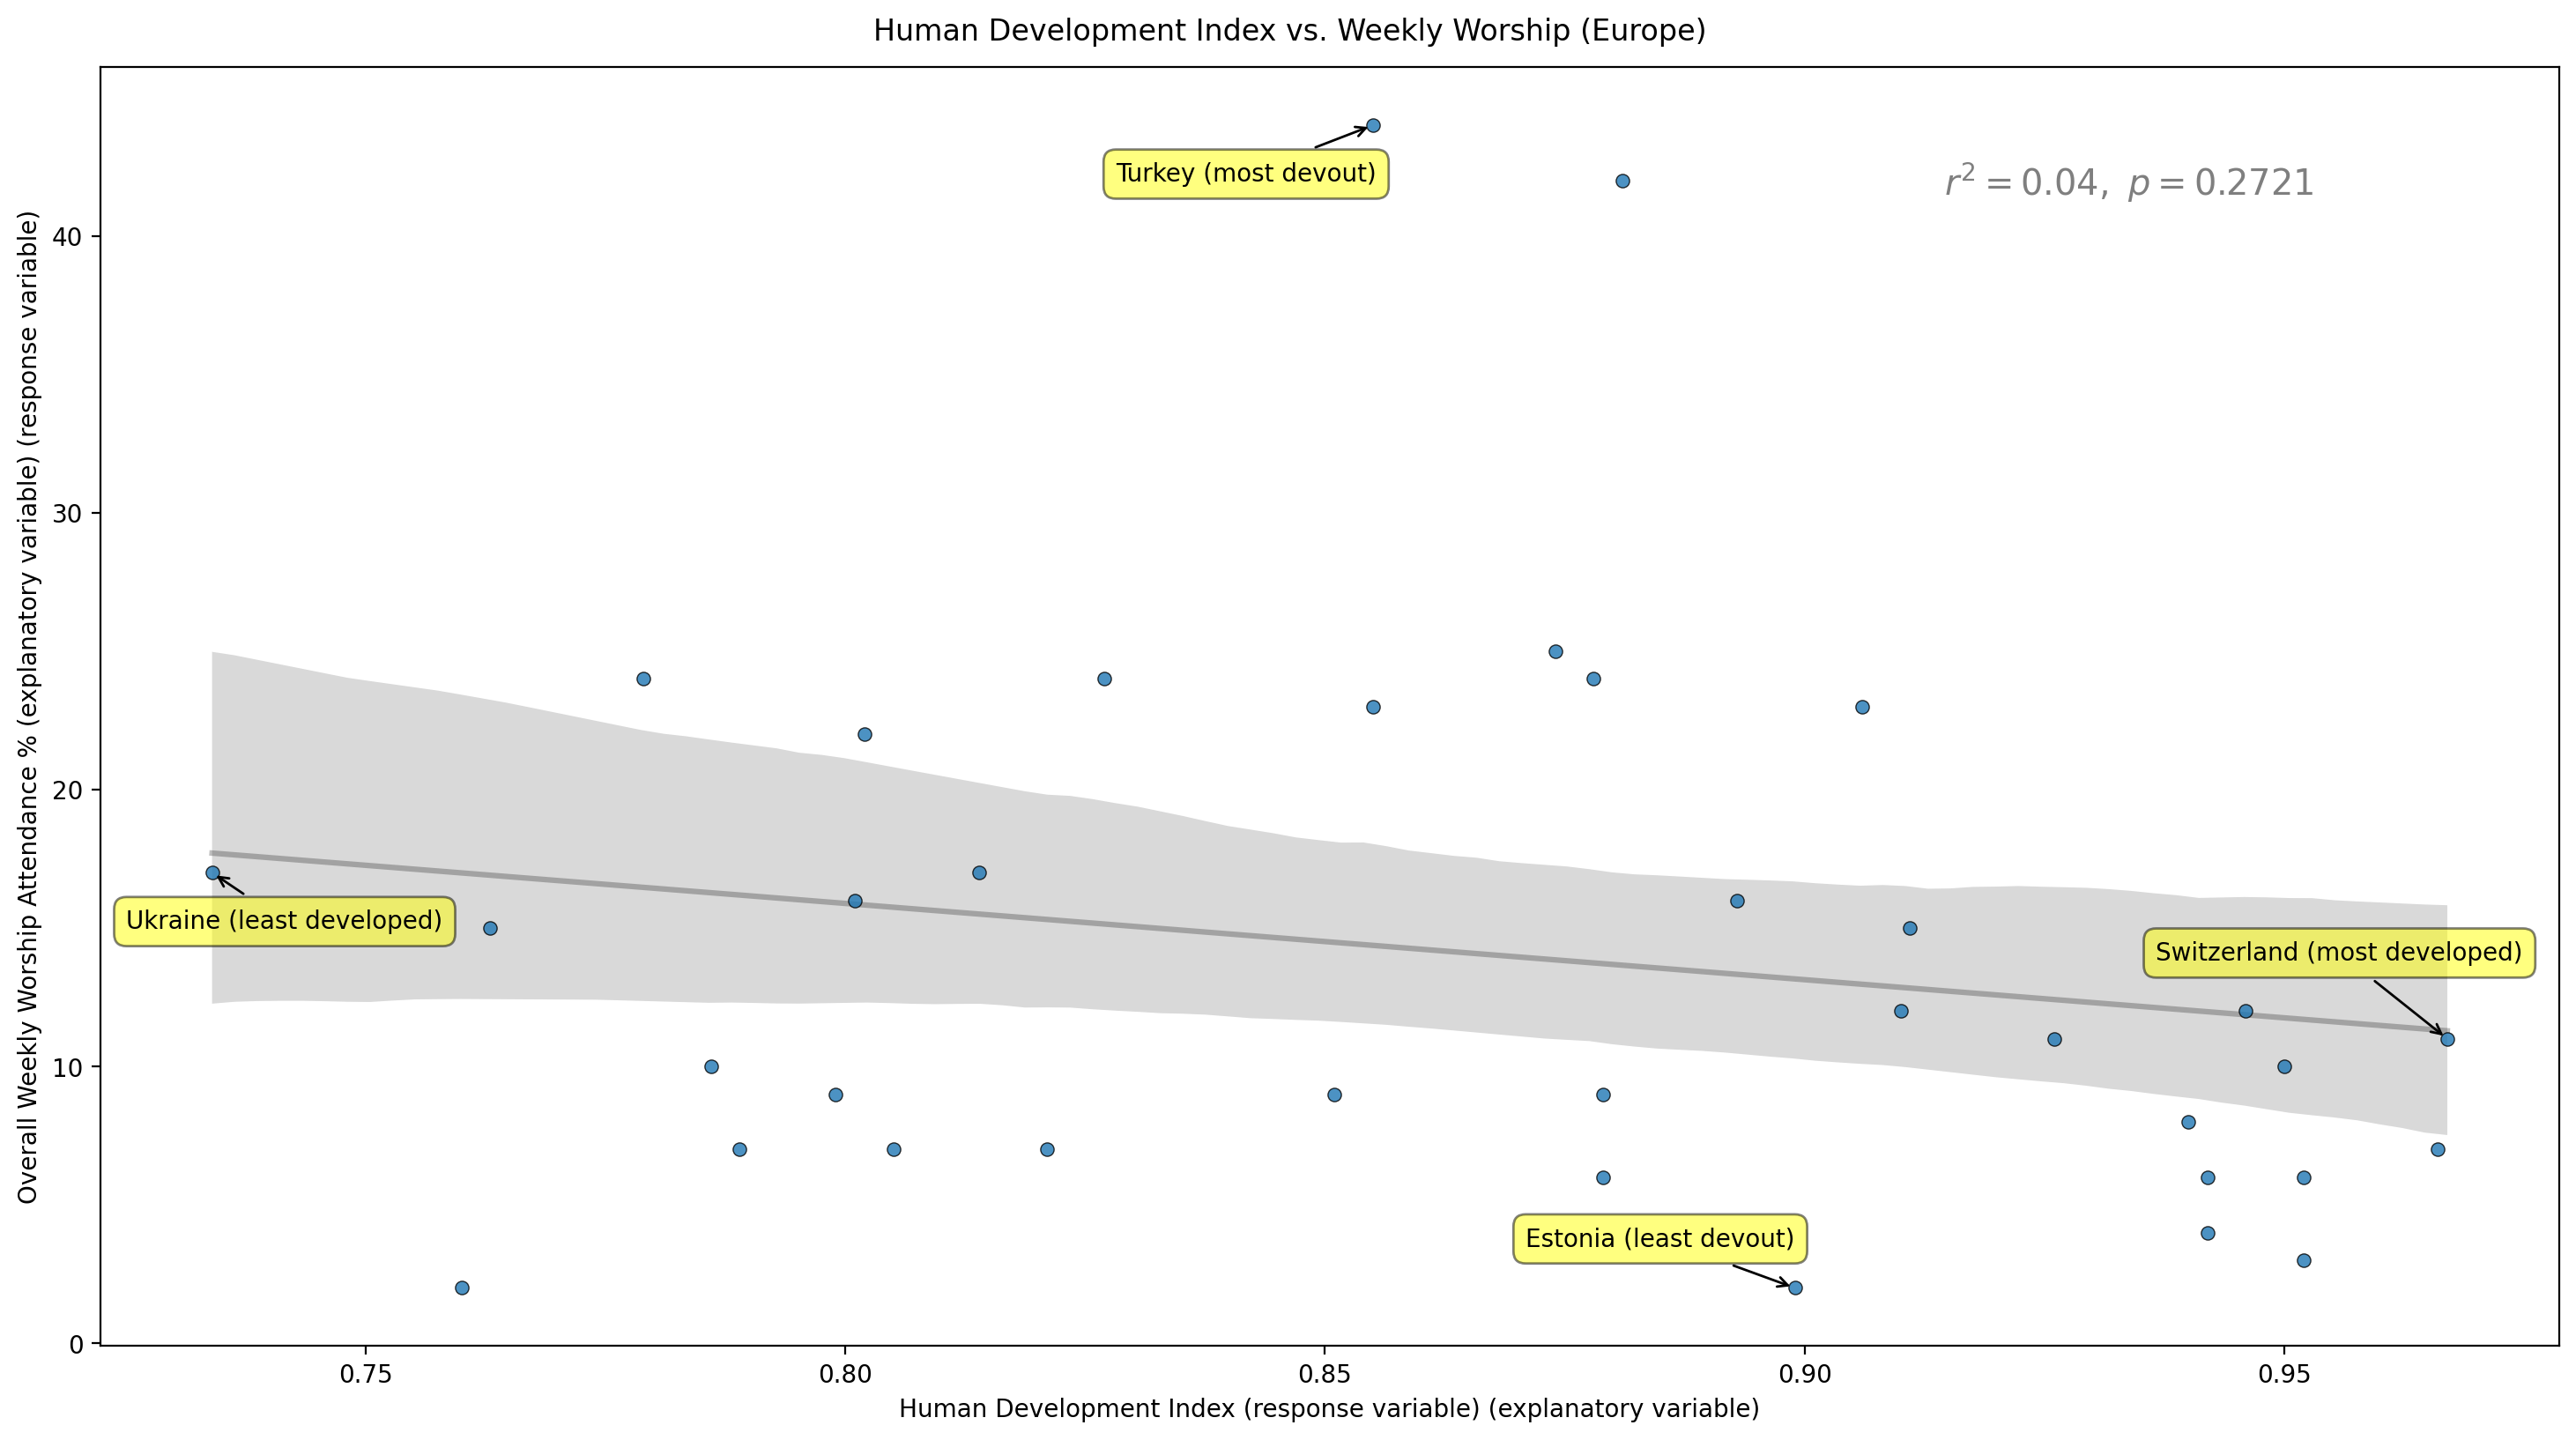

In [90]:

# Filter out non-European countries
mask_series = hdi_vs_worship_df.country_name.isin(european_countries_list)
fig = nu.first_order_linear_scatterplot(
    hdi_vs_worship_df[mask_series].set_index('country_name'), 'hdi_value', 'Overall_Attend_weekly',
    xlabel_str='Human Development Index (response variable)',
    ylabel_str='Overall Weekly Worship Attendance % (explanatory variable)',
    x_adj='developed', y_adj='devout',
    title='Human Development Index vs. Weekly Worship (Europe)',
    # idx_reference='Kenya', annot_reference='',
    least_x_xytext=(-35, -25), most_x_xytext=(-119, 30),
    least_y_xytext=(-110, 15), most_y_xytext=(-105, -25),
    reference_xytext=(-155, -22), color_list=None
)